## Nama     : Irwansyah
## NIM        : 09011181823015
## Kelas     : SK5A


# Ujian Akhir Semester Kuliah Kecerdasan Buatan

# Prediksi Pensiun  Nasabah Bank Dengan Menggunakan Support Vector Machine

# #1: Problem Statement


Disini saya akan mencoba mengembangkan model yang dapat memprediksi apakah pelanggan dapat pensiun atau tidak berdasarkan fiturnya. Fiturnya adalah usia dan simpanan bersih 401K (simpanan pensiun di A.S.).
Dalam kasus kali ini saya akan menggunakan Support Vector Machine untuk memecahkan masalah tersebut.



Referensi Dataset : https://www.kaggle.com/adarshkumarjha/bank-customer-retirement

# #2: Importing Data

In [117]:
import numpy as np   #import numpy untuk analisis statistik data
import seaborn as sns   #Visualisasi data statistik
import matplotlib.pyplot as plt   #Import matplotlib untuk visualisasi data
import pandas as pd   #Import Pandas untuk manipulasi data menggunakan dataframe

### Membaca data dari file aslinya

In [118]:
data = pd.read_csv('Bank_Customer_retirement.csv')

In [119]:
data.head(10)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
5,5,50.499789,742398.9068,1
6,6,39.573302,578650.3156,0
7,7,55.159309,533821.2011,1
8,8,30.791271,459592.4084,0
9,9,40.456073,396800.2509,0


In [120]:
data.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

# #3: Visualisasi Data

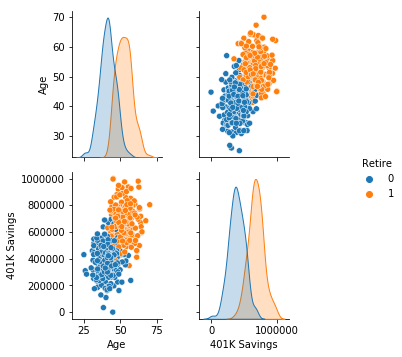

In [121]:
sns.pairplot(data, hue='Retire', vars=['Age', '401K Savings'])

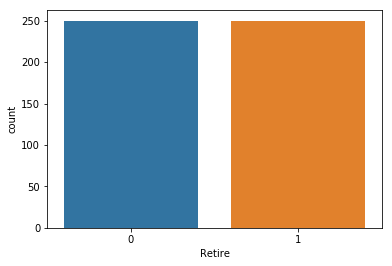

In [122]:
sns.countplot(x='Retire', data=data)

### Dapat juga menggunakan plot lain untuk visualisasi data

# #4: Model Training

Disini kita akan membuang kolom 'Customer ID' karna dirasa tidak diperlukan menggunakan fungsi .drop().

In [123]:
data = data.drop(['Customer ID'], axis=1)

In [124]:
data.head(10)

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
5,50.499789,742398.9068,1
6,39.573302,578650.3156,0
7,55.159309,533821.2011,1
8,30.791271,459592.4084,0
9,40.456073,396800.2509,0


In [125]:
X = data.drop(['Retire'], axis=1)

In [126]:
X.head(10)

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
5,50.499789,742398.9068
6,39.573302,578650.3156
7,55.159309,533821.2011
8,30.791271,459592.4084
9,40.456073,396800.2509


In [127]:
y = data['Retire']

In [128]:
y.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    0
9    0
Name: Retire, dtype: int64

## Membagi data kedalam data training dan data testing

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [130]:
X_test.shape

(100, 2)

In [131]:
X_train.shape

(400, 2)

In [132]:
y_test.shape

(100,)

In [133]:
y_train.shape

(400,)

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
svc_model = SVC()

In [136]:
svc_model.fit(X_train, y_train)

SVC()

# #5: Evaluasi Model

In [137]:
y_predict = svc_model.predict(X_test)

In [138]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [139]:
cm = confusion_matrix(y_test, y_predict)

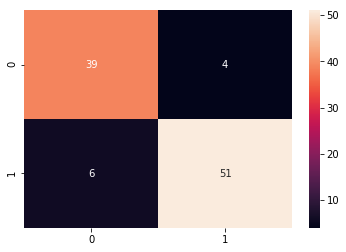

In [140]:
sns.heatmap(cm, annot=True)

In [141]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# #6: Improving the Model

In [142]:
x_train_min = X_train.min()

In [143]:
x_train_min

Age             25.0
401K Savings    10.0
dtype: float64

In [144]:
range_train = X_train.max() - x_train_min

In [145]:
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [146]:
x_train_scaled = (X_train - x_train_min) / range_train

In [147]:
x_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
47,0.588172,0.425905
9,0.365235,0.396794
278,0.692734,0.674955
336,0.170522,0.175254
302,0.514624,0.645350


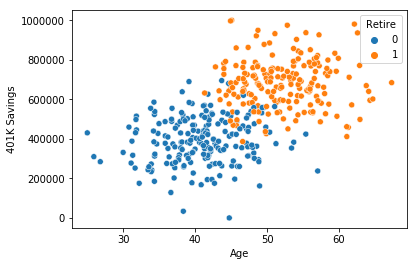

In [148]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = data['Retire'])

## Sekarang kita bisa melihat normalisasi data

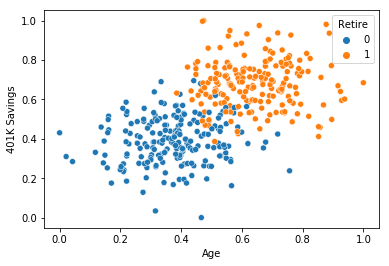

In [149]:
sns.scatterplot(x = x_train_scaled['Age'], y=x_train_scaled['401K Savings'], hue=data['Retire'])

## Berikutnya untuk data test dan Normalisasinya

In [150]:
x_test_min = X_test.min()

In [151]:
x_test_min

Age                 31.787663
401K Savings    109281.634500
dtype: float64

In [152]:
range_test = X_test.max() - x_test_min

In [153]:
range_test

Age                 38.212337
401K Savings    778603.066500
dtype: float64

In [154]:
x_test_scaled = (X_test - x_test_min) / range_test

In [155]:
x_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
280,0.512424,0.709216
474,0.303059,0.384706
269,0.169909,0.458947
40,0.643188,0.664939
222,0.346861,0.651966


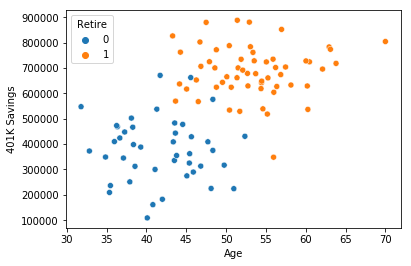

In [156]:
sns.scatterplot(x = X_test['Age'], y = X_test['401K Savings'], hue=y_test)

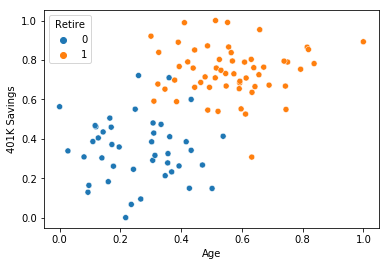

In [157]:
sns.scatterplot(x = x_test_scaled['Age'], y = x_test_scaled['401K Savings'], hue=y_test)

In [158]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
scv_model = SVC()

In [160]:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [161]:
y_predict = svc_model.predict(x_test_scaled)

In [162]:
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [163]:
cm = confusion_matrix(y_test, y_predict)

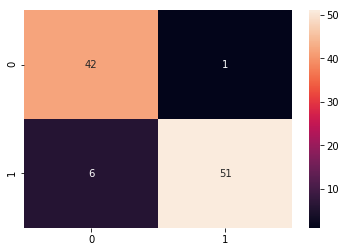

In [164]:
sns.heatmap(cm, annot=True)

In [165]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



# Improving the Model - Part 2

## Parameter C dan parameter Gamma digunakan untuk membangun model umum / overfitted

In [166]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.0, 1, 0.001], 'kernel':['rbf']}

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose=4)

In [169]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.0, 1, 0.001], 'kernel': ['rbf']},
             verbose=4)

In [170]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [171]:
grid_predict = grid.predict(x_test_scaled)

In [172]:
cm = confusion_matrix(y_test, grid_predict)

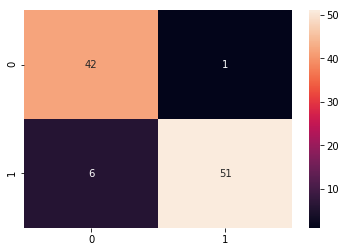

In [173]:
sns.heatmap(cm, annot=True)

In [174]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

